Exercise 1:
$$
A = \begin{bmatrix}
0 & 1 & 0 &  \\
1 & 0 & 0 
\end{bmatrix}
$$

$C = AA^{T}$ such that $C$ is a diagonal matrix, identity is this case which eigenvalues are 1 and eigenvectors are the columns of C already, this eigenvector would be the left singular eigenvectors when computing SVD.

$$
A = U\Sigma V^{*} = \begin{bmatrix} 1 & 0  \\0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0  \\0 & 1 \end{bmatrix} \begin{bmatrix} 0 & 1 & 0 &  \\1 & 0 & 0 \end{bmatrix}
$$

We define the pseudoinverse of $A$ as $A^{+}$.

$$
A^{+}=V\Sigma^{-1}U^{*}=A^T(AA^T)^{⁻1} \Rightarrow A^{+} = \begin{bmatrix}
0 & 1  \\
1 & 0 \\
0 & 0 
\end{bmatrix}
$$



Exercise 2:

$$
\lVert A \rVert = \sqrt{\sum_{j=1}^{n}(\sigma_j)^2}
$$

One can prove this claim, by using the cyclic property of the Trace. It is well known, that one can define the l2 norm as the Trace of the matrix, due the similarity between Frobenius and l2 norms, one can extend this property to the Frobenius too.

$$
(\lVert A \rVert)_F = \sqrt{Tr(A^{*}A)}=\sqrt{Tr(VDU^{*}UDV^{*})}= \sqrt{Tr(D^2)}= \sqrt{\sum_{j=1}^{n}(\sigma_j)^2}
$$

Where $\sigma$ are the singular values of D. $A=UDV^{*}$.

Exercise 3:
$$
 \langle  \;x ,y \; \rangle \ =(\lVert x,y \rVert)_2 = y^{T}x
$$

By inspecting the above properties one can first conclude that in order for $y^{T}x=y^{T}Mx$ then $M=I$, where $I$ is the identity matrix. However given the characteristics of matrices, there exists a stronger condition for M such that the result is not affected. Extending from the identity matrix, we know $I$ is a symmetric matrix with positive eigenvalues, given so one can claim that $M$ must be a symetric matrix, where upper triangular matrix is equal to lower triangular matrix, and which eigenvalues are positive and real entrices. One concludes M must be:

- Symmetric
- Posivite define

Exercise 4:


(220, 220)


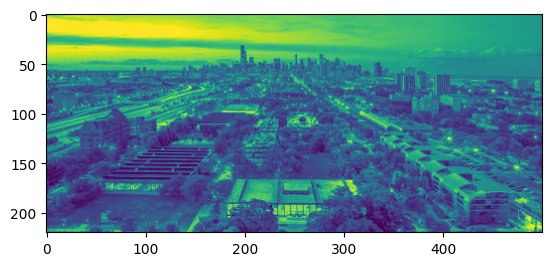

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('HW1Q4.csv',delimiter=',')

U,S,Vc = np.linalg.svd(data, full_matrices = False)
print(U.shape)
plt.imshow(data)

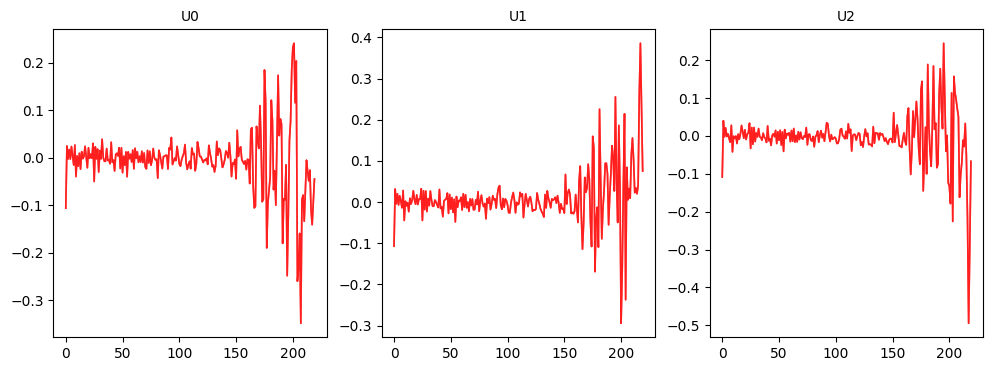

In [4]:
fig, m = plt.subplots(nrows=1, ncols=3, figsize=(12,4 ))
a = 0.5
for i in range(3):
  m[i].plot(U[i], linestyle='-', color='red', alpha = a, linewidth=1.2, label=f'U1')
  m[i].plot(U[i], linestyle='-', color='red', alpha = a, linewidth=1.2, label=f'U2')
  m[i].plot(U[i], linestyle='-', color='red', alpha = a, linewidth=1.2, label=f'U3')
 # ax[0].legend()
  m[i].set_title(f"U{i}",fontdict={"size":10})

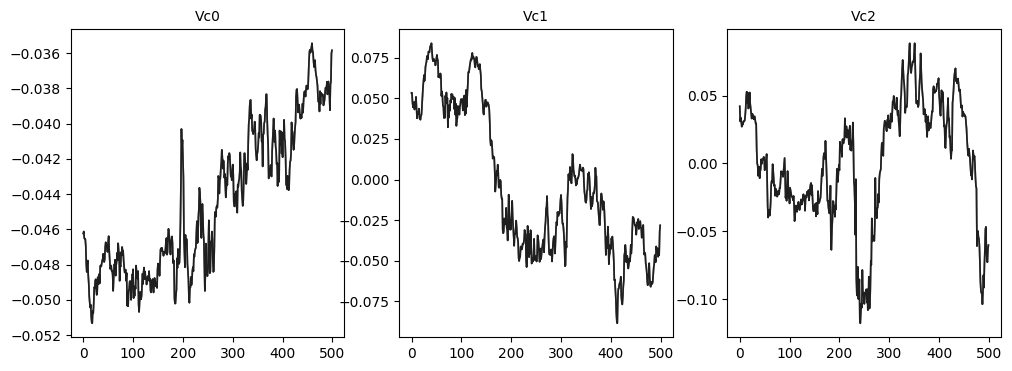

In [7]:
fig, m = plt.subplots(nrows=1, ncols=3, figsize=(12,4 ))

a = 0.5
for i in range(3):
  m[i].plot(Vc[i], linestyle='-', color='black', alpha = a, linewidth=1.2, label=f'Vc1')
  m[i].plot(Vc[i], linestyle='-', color='black', alpha = a, linewidth=1.2, label=f'Vc2')
  m[i].plot(Vc[i], linestyle='-', color='black', alpha = a, linewidth=1.2, label=f'Vc3')
  #ax[0].legend()
  m[i].set_title(f"Vc{i}",fontdict={"size":10})

Text(0.5, 1.0, 'Eigen-Values')

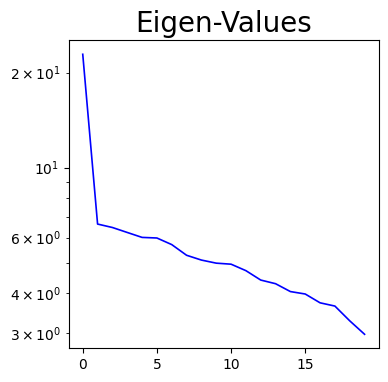

In [32]:
fig, m = plt.subplots(nrows=1, ncols=1, figsize=(4,4 ))
a = 1
m.semilogy(S, linestyle='-', color='b', alpha = a, linewidth=1.2, label=f'U1')
m.set_title(f"Eigen-Values",fontdict={"size":20})

In [33]:
projected_data = np.dot( U[:,:3], np.dot(np.diag(S[:3]), Vc[:3,:]) )

l2_norm_squared = np.linalg.norm(projected_data, 'fro')**2


trace_projected = (np.matrix.trace(np.diag(S[:3])**2))


#Compare
print(f"Trace of the square eigenvalue matrix {trace_projected}")
print(f"The square of the forbenius norm of projected matrix is {l2_norm_squared}")




Trace of the square eigenvalue matrix 607.7390874111895
The square of the forbenius norm of projected matrix is 607.73908741119


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('HW1Q4.csv',delimiter=',')

U,S,Vc = np.linalg.svd(data, full_matrices = False)
print(U.shape)
plt.imshow(data)

Exercise 5.1: Lasso fit model

First approach is based on the lasso model. Simple way to solve a linear regression by using the coefficients as coins


In [19]:
import cvxpy as cp
import numpy as np
from sklearn.linear_model import Lasso

# Load matrices C and vector b from files
C = np.loadtxt('hw1Q5C.dat', delimiter=',')
b = np.loadtxt('hw1Q5b.dat')

dimensions = C.shape
# Solve the compressed sensing problem using L1 regularization (Lasso)
lasso = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength
lasso.fit(C, b)
x_fake = lasso.coef_
non_zeros = np.count_nonzero(x_fake)
positions = np.where(x_fake != 0)[0]
print(f"number of non-zero: {np.count_nonzero(x_fake)}" )
print(f"Fake coins: {positions}")




number of non-zero: 6
Fake coins: [17 28 34 54 70 98]


Exercise 5.2: Inverse C matrix multiplication

By the usage of the pseudo inverse of C, one can calculate x

$$
X = V\Sigma^{+}U^{*}b
$$

In [31]:
import numpy as np
U, S, Vc = np.linalg.svd(C, full_matrices=False)
print(U.shape, S.shape, Vc.shape)
Uc = np.conjugate(U.T)
V = np.conjugate(Vc.T)
a =np.dot(np.diag(1/S), Uc)
Cplus = np.matmul(V, a)

x_fake_2 = np.matmul(Cplus,b)
non_zeros_2 = np.count_nonzero(x_fake)
positions_2 = np.where(x_fake_2 != 0)[0]
print(f"number of non-zero: {np.count_nonzero(x_fake_2)}" )
print(f"Fake coins: {positions_2}")

(20, 20) (20,) (20, 100)
number of non-zero: 100
Fake coins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize

Cdata = 'hw1Q5C.dat'
bdata= 'hw1Q5b.dat'

C= np.loadtxt(Cdata, delimiter=',')
b = np.loadtxt(bdata)

print(f"shape of C is {C.shape}")
print(f"shape of b is {b.shape}")


def L1_norm(x):
  return np.linalg.norm(x, ord=1)

constraints = ({'type': 'eq', 'fun' : lambda x: C @ x - b })

x0 = np.linalg.pinv(C) @ b  # initialization

res = minimize(L1_norm, x0 , method='SLSQP', constraints=constraints)
s_L1 = res.x


print(s_L1.shape)
nonzeros2= np.where(np.abs(s_L1) > 0.01)
print(f"fake coins: {nonzeros2}")

shape of C is (20, 100)
shape of b is (20,)
(100,)
fake coins: (array([17, 54, 70, 98]),)


Exercise 6:

In [29]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt
from scipy.optimize import minimize

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.exp(1j*omega1*t[tt])+v2*np.exp(1j*omega2*t[tt]) 

Reduced DMD code for exercise 6 of HW 1. The main complexity of this code relies on how the SVD is performed in python. Opposite to matlab, the SVD decomposition right eigenvector is not conjugated when outputed by the SVD but in its natural form. 

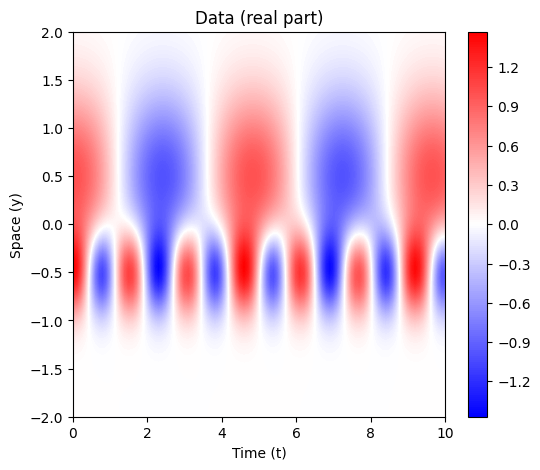

In [30]:
T, Y = np.meshgrid(t, y)
fig, r = plt.subplots(figsize=(6,5))
plot_data=r.contourf(T,Y,np.real(X),200,cmap='bwr')
fig.colorbar(plot_data, ax=r)
r.set_title('Data (real part)')
r.set_ylabel('Space (y)')
r.set_xlabel('Time (t)')
plt.show()

In [31]:
r=2

# We define matrices

X1=X[:,:-1]
X2=X[:,1:]

# SVD - Reduce rank 

U, S, VT = np.linalg.svd(X1,full_matrices=0)
   
Ur = U[:,:r]
Sr = np.diag(S[:r])
Vtc = VT[:r,:]

# Build Atilde 

Atilde = np.linalg.solve(Sr.T,(np.conjugate(Ur.T) @ X2 @ np.conjugate(Vtc.T) ).T).T

Lambda, W = np.linalg.eig(Atilde) 

# Build DMD modes

Phi = X2 @ np.linalg.solve(Sr.T,np.conjugate(Vtc)).T @ W     

# Build amplitude

alpha1 = Sr @ np.conjugate(Vtc[:,0])
b = np.linalg.solve(W @ np.diag(Lambda),alpha1)

/tmp/ipykernel_23241/2643247238.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:,iter]=b * np.exp(omega * t[iter])


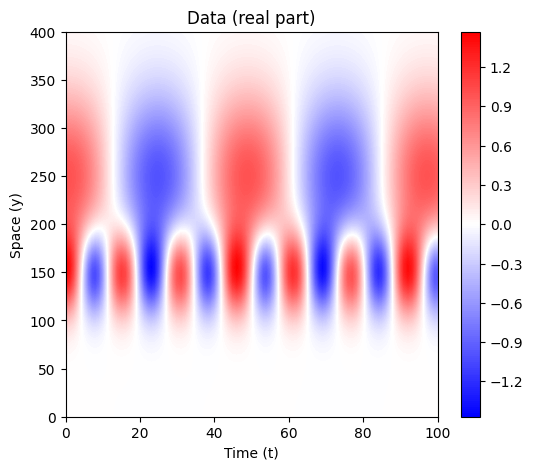

In [32]:
dt=t[1]-t[0]
omega=np.log(Lambda)/dt

time_dynamics=np.zeros(shape=(r,len(t)))
for iter in range(len(t)):
    time_dynamics[:,iter]=b * np.exp(omega * t[iter])
X_dmd=Phi@time_dynamics

T, Y = np.meshgrid(t, y)
fig, i = plt.subplots(figsize=(6,5))
plot_dataa=i.contourf(np.real(X_dmd),200,cmap='bwr')
fig.colorbar(plot_dataa, ax=i)
i.set_title('Data (real part)')
i.set_ylabel('Space (y)')
i.set_xlabel('Time (t)')
plt.show()